In [8]:
# Download datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")




**EDA**

In [9]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [11]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [12]:
print(customers.shape)
print(products.shape)
print(transactions.shape)


(200, 4)
(100, 4)
(1000, 7)


In [13]:
print(transactions.describe(include=[np.number]))
print(customers.describe(include='object'))


          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


**Checking for Missing or Duplicate Data**

In [14]:
print(customers.isnull().sum())  # Missing values per column
print(customers[customers.isnull().any(axis=1)])  # Rows with missing data


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []


In [15]:
print(customers.duplicated().sum())  # Count duplicates
print(customers[customers.duplicated()])  # Show duplicate rows


0
Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []


**Distribution Analysis**


In [16]:
print(customers['Region'].value_counts())
print(products['Category'].value_counts(normalize=True))  # As percentages


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Category
Books          0.26
Electronics    0.26
Clothing       0.25
Home Decor     0.23
Name: proportion, dtype: float64


In [17]:
print(customers['Region'].nunique())  # Number of unique regions
print(products['Category'].unique())  # List of unique categories


4
['Books' 'Electronics' 'Home Decor' 'Clothing']


**Analyzing Relationships Between Variables**


            Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


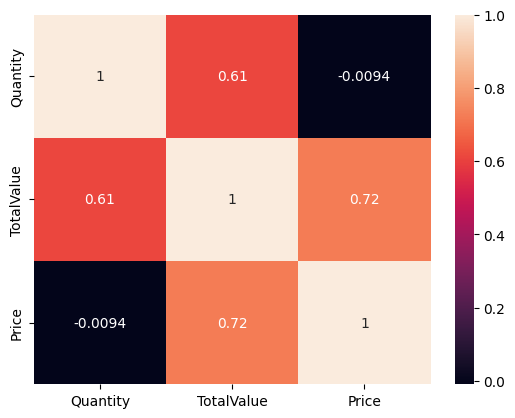

In [38]:
numerical_cols = transactions.select_dtypes(include=np.number).columns
corr_matrix = transactions[numerical_cols].corr()

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [20]:
print(transactions.groupby('ProductID')['TotalValue'].mean())  # Avg value per product
print(customers.groupby('Region')['CustomerID'].count())  # Count by region


ProductID
P001     380.925000
P002    1082.187500
P003     113.976667
P004     246.060000
P005    1287.930000
           ...     
P096     696.932000
P097     887.055556
P098     685.554286
P099     974.297500
P100     315.850000
Name: TotalValue, Length: 100, dtype: float64
Region
Asia             45
Europe           50
North America    46
South America    59
Name: CustomerID, dtype: int64


**Analyzing Time-Based Patterns**

<ipython-input-24-d2447d102ace>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.set_index('TransactionDate').resample('M')['TotalValue'].sum().plot()


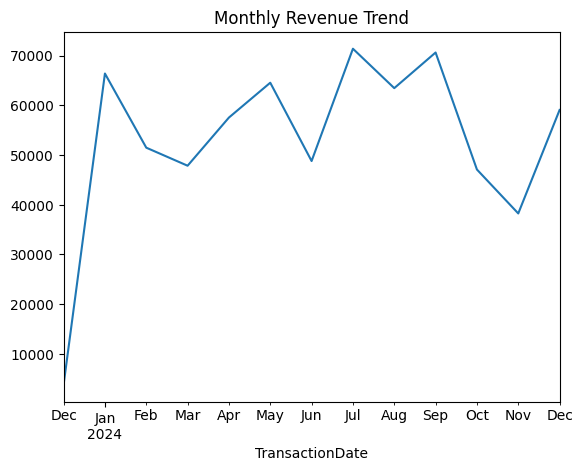

In [24]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate').resample('M')['TotalValue'].sum().plot()
plt.title("Monthly Revenue Trend")
plt.show()


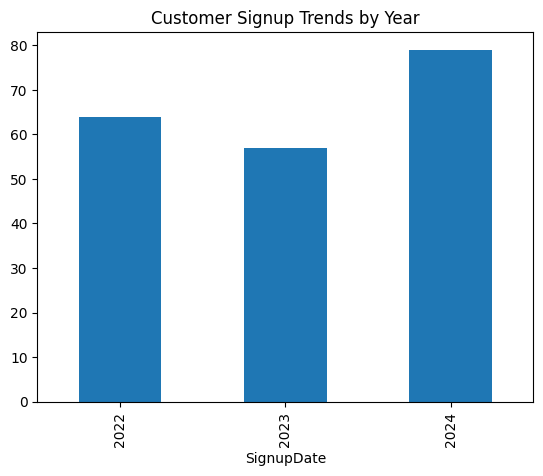

In [25]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Customer Signup Trends by Year")
plt.show()


In [26]:
print(products.nlargest(5, 'Price'))  # Top 5 most expensive products
print(transactions.nlargest(10, 'TotalValue'))  # Top 10 highest-value transactions


   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
879        T00928      C0082      P075 2024-09-06 18:39:07         4   
509        T00499      C0065      P032 2024-07-18 02:51:22         4   
971        T00307      C0044      P045 2024-05-30 18:15:28         4   
560        T00070      C0051      P017 2024-12-11 13:46:30         4   
562        T00224      C0171      P017 2024-07-06 23:53:24         4   
565        T00503      C0013      P017 2024-07-26 00:21:59         4   
566        T00558      C0169      P017 2024-11-29 23:39:00         4   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
118        T0001

**customer life-time value**

In [27]:
clv = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(clv.head(10))  # Top 10 customers by lifetime value


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


**DATA VISUALIZATION**


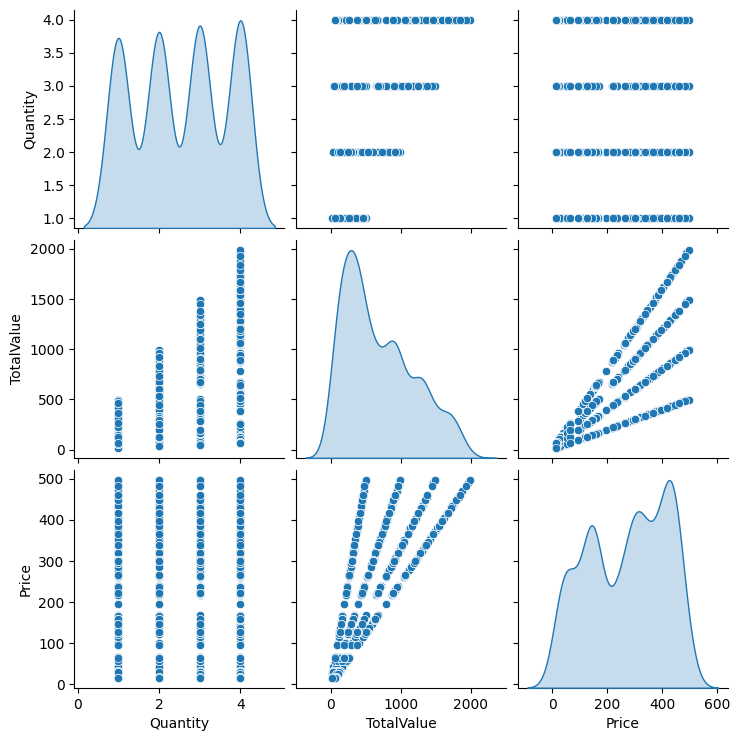

In [28]:
sns.pairplot(transactions, diag_kind='kde')  # Relationships between numerical columns
plt.show()


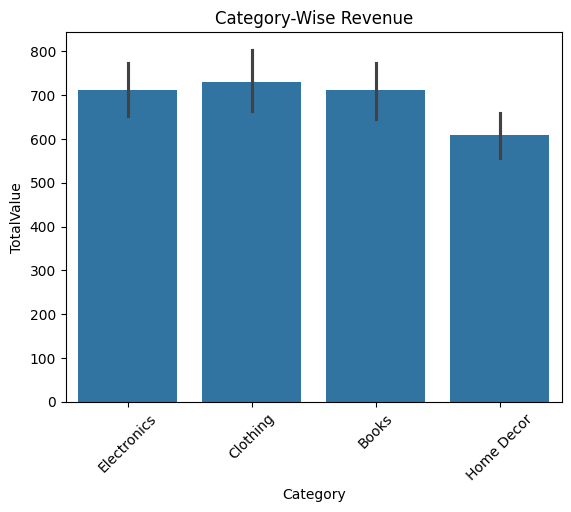

In [29]:
sns.barplot(x='Category', y='TotalValue', data=transactions.merge(products, on='ProductID'))
plt.title("Category-Wise Revenue")
plt.xticks(rotation=45)
plt.show()


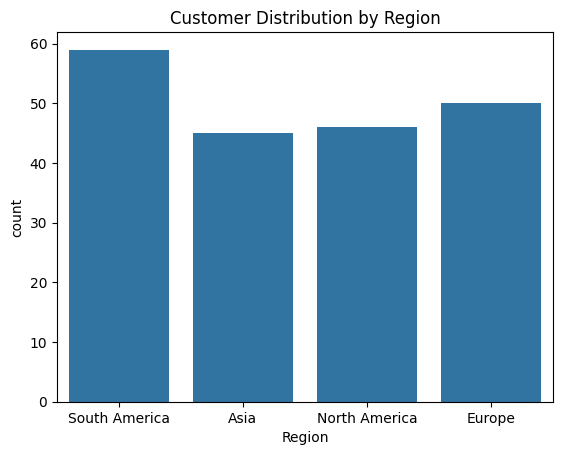

In [30]:
# Visualizations (example)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

**Task 2 : Lookalike Model**

(This code is implementing a lookalike model using cosine similarity to identify similar customers based on their purchase behavior)

Key Takeaways:
Purpose: Identifies the top 3 most similar customers for each of the first 20

customers (C0001–C0020) based on their purchase behavior.

Features Used: Total spending, total quantity purchased, and the most frequently purchased product category.

Output: A CSV file (Lookalike.csv) with the list of similar customers for the first 20 customers.





In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Merge datasets
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Create customer features
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Category': lambda x: x.value_counts().index[0]  # Most bought category
}).reset_index()

# Similarity model
features = pd.get_dummies(customer_features.drop('CustomerID', axis=1))
similarity = cosine_similarity(features)

# Find lookalikes for C0001–C0020
lookalikes = {}
for i in range(20):
    cust_id = customer_features.iloc[i]['CustomerID']
    scores = list(enumerate(similarity[i]))
    scores = sorted(scores, key=lambda x: -x[1])[1:4]  # Top 3 lookalikes
    lookalikes[cust_id] = [(customer_features.iloc[idx]['CustomerID'], score) for idx, score in scores]

# Save lookalikes
import csv
with open("Lookalike.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(["CustomerID", "Lookalikes"])
    for key, value in lookalikes.items():
        writer.writerow([key, value])


In [37]:


import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import csv


def evaluate_recommendations(lookalikes, transactions, customer_features):
    """
    Evaluates the quality of recommendations based on transaction history and similarity scores.

    Args:
        lookalikes (dict): Dictionary of lookalike customers and their similarity scores.
        transactions (pd.DataFrame): Transactions dataframe.
        customer_features (pd.DataFrame): Customer features dataframe.

    Returns:
        pd.DataFrame: DataFrame with evaluation metrics for each customer.
    """

    evaluation_results = []

    for customer_id, similar_customers in lookalikes.items():
        # Get the actual purchases of the customer
        customer_purchases = set(transactions[transactions['CustomerID'] == customer_id]['ProductID'])

        # Get purchases of lookalike customers
        lookalike_purchases = set()
        for similar_cust_id, _ in similar_customers:
          lookalike_purchases.update(transactions[transactions['CustomerID'] == similar_cust_id]['ProductID'])

        # Calculate metrics
        n_common_purchases = len(customer_purchases.intersection(lookalike_purchases))
        precision = n_common_purchases / len(lookalike_purchases) if len(lookalike_purchases) > 0 else 0  # Handle cases where lookalike has no purchases
        recall = n_common_purchases / len(customer_purchases) if len(customer_purchases) > 0 else 0     # Handle cases where the customer has no purchases

        # Get average similarity score
        avg_similarity = np.mean([score for _, score in similar_customers])

        evaluation_results.append({
            'CustomerID': customer_id,
            'Precision': precision,
            'Recall': recall,
            'AvgSimilarityScore': avg_similarity
        })

    return pd.DataFrame(evaluation_results)


# Example usage (assuming you have the necessary dataframes):
evaluation_df = evaluate_recommendations(lookalikes, transactions, customer_features)
print(evaluation_df)
# evaluation_df.to_csv("recommendation_evaluation.csv", index=False)

   CustomerID  Precision    Recall  AvgSimilarityScore
0       C0001   0.076923  0.200000            1.000000
1       C0002   0.000000  0.000000            1.000000
2       C0003   0.142857  0.500000            1.000000
3       C0004   0.000000  0.000000            1.000000
4       C0005   0.000000  0.000000            1.000000
5       C0006   0.133333  0.500000            1.000000
6       C0007   0.000000  0.000000            1.000000
7       C0008   0.200000  0.300000            1.000000
8       C0009   0.000000  0.000000            1.000000
9       C0010   0.062500  0.250000            1.000000
10      C0011   0.047619  0.200000            1.000000
11      C0012   0.055556  0.166667            1.000000
12      C0013   0.136364  0.428571            1.000000
13      C0014   0.000000  0.000000            0.999997
14      C0015   0.000000  0.000000            1.000000
15      C0016   0.000000  0.000000            1.000000
16      C0017   0.058824  0.125000            1.000000
17      C0

In [ ]:
lookalike = pd.read_csv("/content/Lookalike.csv")
lookalike.head(20)

,CustomerID,Lookalikes
0,C0001,"[('C0069', 0.9999999934340833), ('C0101', 0.99..."
1,C0002,"[('C0003', 0.9999999587604103), ('C0025', 0.99..."
2,C0003,"[('C0031', 0.9999999800265182), ('C0025', 0.99..."
3,C0004,"[('C0169', 0.9999999926262992), ('C0017', 0.99..."
4,C0005,"[('C0069', 0.9999999890676641), ('C0127', 0.99..."
5,C0006,"[('C0126', 0.9999999998071625), ('C0171', 0.99..."
6,C0007,"[('C0146', 0.9999999999398864), ('C0048', 0.99..."
7,C0008,"[('C0113', 0.9999999935751916), ('C0086', 0.99..."
8,C0009,"[('C0150', 0.9999998103756369), ('C0167', 0.99..."
9,C0010,"[('C0049', 0.9999999256230946), ('C0091', 0.99..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
lookalike.shape

(20, 2)

**Task 3: Customer Segmentation/Clustering**


Davies-Bouldin Index: 0.7075972450928086


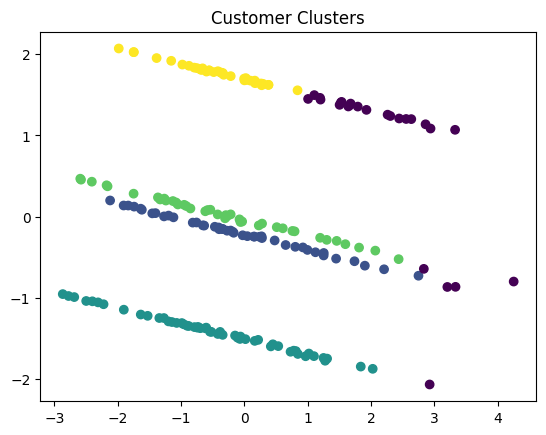

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

db_index = davies_bouldin_score(features_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)
plt.title('Customer Clusters')
plt.show()
